<a href="https://colab.research.google.com/github/Shahilasulthana/DeepLearning/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [3]:
import os

os.listdir(path)


['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [4]:
import pandas as pd

df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [9]:
import kagglehub

path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print(path)


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
/kaggle/input/telco-customer-churn


In [10]:
import os

os.listdir(path)

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [11]:
import pandas as pd
import os

file_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

data = pd.read_csv(file_path)

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
data.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
# Drop missing values if any
data.dropna(inplace=True)

In [14]:
# Convert categorical columns into numeric
label_encoder = LabelEncoder()

for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])


In [15]:
# Independent variables (X)
X = data.drop('Churn', axis=1)

# Dependent variable (y)
y = data['Churn']


In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
# Initialize ANN model
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(8, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [20]:
history = model.fit(
    X_train,
    y_train,
    epochs=35,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/35
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6564 - loss: 0.5996 - val_accuracy: 0.7507 - val_loss: 0.4654
Epoch 2/35
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7263 - loss: 0.4876 - val_accuracy: 0.7533 - val_loss: 0.4410
Epoch 3/35
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7235 - loss: 0.4626 - val_accuracy: 0.7533 - val_loss: 0.4347
Epoch 4/35
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7313 - loss: 0.4533 - val_accuracy: 0.7879 - val_loss: 0.4330
Epoch 5/35
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7767 - loss: 0.4486 - val_accuracy: 0.7853 - val_loss: 0.4309
Epoch 6/35
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7856 - loss: 0.4405 - val_accuracy: 0.7853 - val_loss: 0.4294
Epoch 7/35
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7892 - loss: 0.4464 - val_accuracy: 0.7844 - val_loss: 0.4270
Epoch 8/35
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7962 - loss: 0.4303 - val_accuracy: 0.

In [21]:
# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities into binary output
y_pred = (y_pred_prob > 0.5).astype(int)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8005677785663591


In [23]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.6329479768786127


In [24]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.5871313672922251


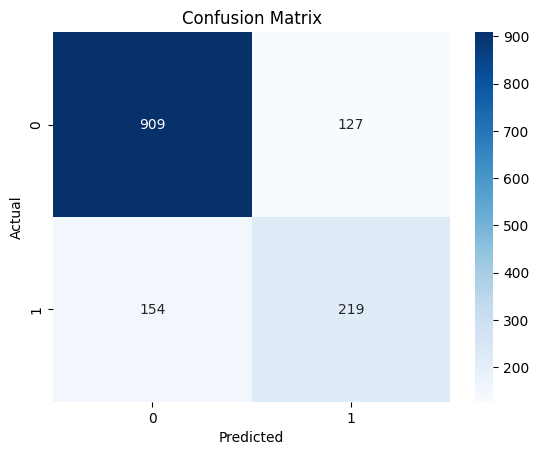

In [25]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
